# Base model

Final base model will be built and tested. Feature engineering is applied; numerical features are standardized.  
No Hyperparameter-Tuning yet.

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import validation_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

from src.features.data_prep_for_model import clean_data, feature_engineer, prep_data_for_model, pipeline_classifier

In [2]:
# read data
df = pd.read_csv('data/spotify_dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Data preparation

In [3]:
# get features and target sets for train, test and val data from function output
features_train, target_train, features_test, target_test, features_val, target_val = prep_data_for_model(df)

features_train.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,tracks_per_artist,track_name_length,album_name_length
41996,211533,0,0.305,0.8490,9,-10.795,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,1,10,16
76471,196000,0,0.287,0.1900,7,-12.030,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,7,38,16
54809,216506,0,0.583,0.5090,1,-9.661,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,17,18,6
16326,218346,0,0.163,0.0368,8,-23.149,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,1,28,20
109799,173160,0,0.647,0.9210,2,-7.294,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,99,12,15


In [4]:
# getting columns easy for copy-paste
print(features_train.columns)

# specific categories (for onehotencoding) and num cols list for pipeline
CAT_COLS = ['key', 'time_signature']

NUM_COLS = [col for col in features_train.columns if col not in CAT_COLS]

print(CAT_COLS)
print(NUM_COLS)

Index(['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'tracks_per_artist',
       'track_name_length', 'album_name_length'],
      dtype='object')
['key', 'time_signature']
['duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'tracks_per_artist', 'track_name_length', 'album_name_length']


### Model training
Models of interest: Classifiers with "balanced weight" parameter like RandomForestClassifier and LogisticRegression.

In [16]:
# test model #1: RandomForestClassifier
# use pipeline function for preprocessing
pipeline_rfc = pipeline_classifier(cat_cols=CAT_COLS,
                                   num_cols=NUM_COLS,
                                   classifier=RandomForestClassifier,
                                   class_weight='balanced',
                                   random_state=42)

# train model and predict on test data
pipeline_rfc.fit(features_train, target_train)
target_test_pred = pipeline_rfc.predict(features_test)

# show metrics
print('Confusion Matrix: \n', confusion_matrix(target_test, target_test_pred), '\n')
print('Classification Report: \n', classification_report(target_test, target_test_pred))

# predict on val data
target_val_pred = pipeline_rfc.predict(features_val)

# show metrics
print('Confusion Matrix: \n', confusion_matrix(target_val, target_val_pred), '\n')
print('Classification Report: \n', classification_report(target_val, target_val_pred))

# save classification report of val data in results folder of src to load it later for direct comparison
rfc_model_classification_report = classification_report(target_val, target_val_pred, output_dict=True)
rfc_model_classification_report = pd.DataFrame(rfc_model_classification_report).transpose()
rfc_model_classification_report.columns = ['precision_rfc', 'recall_rfc', 'f1_score_rfc', 'support_rfc']
rfc_model_classification_report.to_csv('classification_reports/rfc_model_classification_report.csv')

Confusion Matrix: 
 [[  221     2   215     4]
 [    2  1868  3292   100]
 [    6   401 12302    20]
 [    5   195   788  1036]] 

Classification Report: 
               precision    recall  f1-score   support

        High       0.94      0.50      0.65       442
         Low       0.76      0.35      0.48      5262
      Medium       0.74      0.97      0.84     12729
     Unknown       0.89      0.51      0.65      2024

    accuracy                           0.75     20457
   macro avg       0.83      0.58      0.66     20457
weighted avg       0.76      0.75      0.72     20457

Confusion Matrix: 
 [[ 118    3  118    3]
 [   0  965 1719   63]
 [   6  192 6174    4]
 [   1  117  457  614]] 

Classification Report: 
               precision    recall  f1-score   support

        High       0.94      0.49      0.64       242
         Low       0.76      0.35      0.48      2747
      Medium       0.73      0.97      0.83      6376
     Unknown       0.90      0.52      0.66      118

In [17]:
# test model #2: Logistic Regression
# use pipeline function for preprocessing
pipeline_log = pipeline_classifier(cat_cols=CAT_COLS,
                                   num_cols=NUM_COLS,
                                   classifier=LogisticRegression,
                                   max_iter=1000,
                                   C=0.5,
                                   class_weight='balanced',
                                   random_state=42)

# train model and predict on test data
pipeline_log.fit(features_train, target_train)
target_test_pred = pipeline_log.predict(features_test)

# show metrics
print('Confusion Matrix: \n', confusion_matrix(target_test, target_test_pred), '\n')
print('Classification Report: \n', classification_report(target_test, target_test_pred))

# predict on val data
target_val_pred = pipeline_log.predict(features_val)

# show metrics
print('Confusion Matrix: \n', confusion_matrix(target_val, target_val_pred), '\n')
print('Classification Report: \n', classification_report(target_val, target_val_pred))

# save classification report of val data in results folder of src to load it later for direct comparison
log_model_classification_report = classification_report(target_val, target_val_pred, output_dict=True)
log_model_classification_report = pd.DataFrame(log_model_classification_report).transpose()
log_model_classification_report.columns = ['precision_log', 'recall_log', 'f1_score_log', 'support_log']
log_model_classification_report.to_csv('classification_reports/log_model_classification_report.csv')

Confusion Matrix: 
 [[ 276   24   76   66]
 [1037 1900 1036 1289]
 [3993 2016 3661 3059]
 [ 711  275  338  700]] 

Classification Report: 
               precision    recall  f1-score   support

        High       0.05      0.62      0.09       442
         Low       0.45      0.36      0.40      5262
      Medium       0.72      0.29      0.41     12729
     Unknown       0.14      0.35      0.20      2024

    accuracy                           0.32     20457
   macro avg       0.34      0.40      0.27     20457
weighted avg       0.58      0.32      0.38     20457

Confusion Matrix: 
 [[ 149   11   47   35]
 [ 587  980  473  707]
 [1953 1049 1795 1579]
 [ 434  124  207  424]] 

Classification Report: 
               precision    recall  f1-score   support

        High       0.05      0.62      0.09       242
         Low       0.45      0.36      0.40      2747
      Medium       0.71      0.28      0.40      6376
     Unknown       0.15      0.36      0.22      1189

    accuracy 

In [ ]:
# compare classification reports of all models (skip last 2 rows of macro avg and weighted avg)
simple_baseline_report = pd.read_csv('classification_reports/simple_model_classification_report.csv', index_col=0, skiprows=[6, 7])
rfc_model_report = pd.read_csv('classification_reports/rfc_model_classification_report.csv', index_col=0, skiprows=[6, 7])
log_model_report = pd.read_csv('classification_reports/log_model_classification_report.csv', index_col=0, skiprows=[6, 7])

#display('Simple baseline model classification report:', simple_baseline_report)
#display('rfc model classification report:', rfc_model_report)

reports_combined = pd.concat([log_model_report, simple_baseline_report, rfc_model_report], axis=1)
pd.options.display.float_format = '{:.2f}'.format

reports_combined

,precision_log,recall_log,f1_score_log,support_log,precision_simple,recall_simple,f1_score_simple,support_simple,precision_rfc,recall_rfc,f1_score_rfc,support_rfc
High,0.05,0.62,0.09,242.00,0.45,0.63,0.53,242.00,0.94,0.49,0.64,242.00
Low,0.45,0.36,0.40,2747.00,0.50,0.46,0.48,2747.00,0.76,0.35,0.48,2747.00
Medium,0.71,0.28,0.40,6376.00,0.77,0.76,0.76,6376.00,0.73,0.97,0.83,6376.00
Unknown,0.15,0.36,0.22,1189.00,0.54,0.66,0.60,1189.00,0.90,0.52,0.66,1189.00
accuracy,0.32,0.32,0.32,0.32,0.67,0.67,0.67,0.67,0.75,0.75,0.75,0.75


In [ ]:
# check cross validation score of model #1: RandomForestClassifier
cv_results_rfc = cross_val_score(estimator=pipeline_rfc,
                            X=features_train,
                            y=target_train,
                            cv=5,
                            scoring='f1_weighted',
                            n_jobs=-1)
cv_results_rfc.mean()

In [20]:
# check cross validation score of model #2: LogisticRegression
cv_results_log = cross_val_score(estimator=pipeline_log,
                            X=features_train,
                            y=target_train,
                            cv=5,
                            scoring='f1_weighted',
                            n_jobs=-1)
cv_results_log.mean()

np.float64(0.38101177436523115)

### Model interpretation (only for final model)

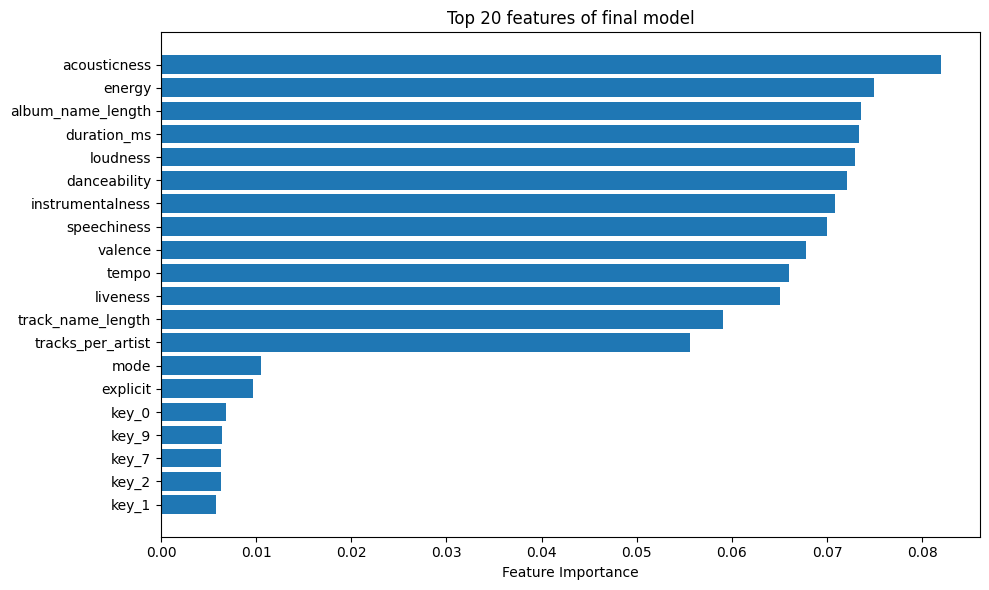

In [23]:
## Final model chosen based on previous scores: ...
# check feature_importances_

# get the classifier and preprocessor
model = pipeline_rfc.named_steps['classifier']
preprocessor = pipeline_rfc.named_steps['preprocessor']

# get feature names after ColumnTransformer
num_features = preprocessor.transformers_[0][2]
cat_features = preprocessor.transformers_[1][1].get_feature_names_out(preprocessor.transformers_[1][2])
all_features = np.concatenate([num_features, cat_features])

# get feature importances
importances = model.feature_importances_

# combine into a DataFrame
feature_importances = pd.DataFrame({
    'feature': all_features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# plot top N
top_n = 20
fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(feature_importances.head(top_n).iloc[::-1]['feature'],
         feature_importances.head(top_n).iloc[::-1]['importance'])
ax.set_xlabel("Feature Importance")
ax.set_title(f"Top {top_n} features of final model")
plt.tight_layout()

In [24]:
# Computing learning curve (could take some time)
train_sizes, train_scores, test_scores = learning_curve(estimator=RandomForestClassifier(class_weight='balanced', random_state = 42), 
                                                        X=features_train, 
                                                        y=target_train, 
                                                        cv=5, 
                                                        scoring='f1_weighted',
                                                        n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 5))

train_sizes_lc = train_sizes
train_mean_lc = train_scores.mean(axis=1)
test_mean_lc = test_scores.mean(axis=1)

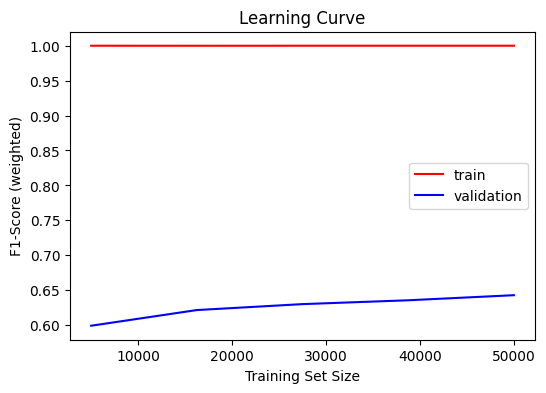

In [25]:
fig_lc, ax = plt.subplots(figsize=(6,4))
ax.plot(train_sizes_lc, train_mean_lc, label="train", color = 'red')
ax.plot(train_sizes_lc, test_mean_lc, label="validation", color = 'blue')

ax.set_title("Learning Curve")
ax.set_xlabel("Training Set Size")
ax.set_ylabel("F1-Score (weighted)")
ax.legend(loc="best")
fig_lc;